# Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
seed = 99
np.random.seed(seed)
n_point = 150
n_half = n_point//2
x1 = np.random.normal(0.7, 0.45, size=(n_half, 2))
x2 = np.random.normal(0.2, 0.3, size=(n_half, 2))
X = np.concatenate([x1, x2])

np.savetxt("./overfit_sample_data.csv", X, delimiter=",")

### Example Problem

Classify 50 data points(2 dimension) with 2 classes(0, 1)

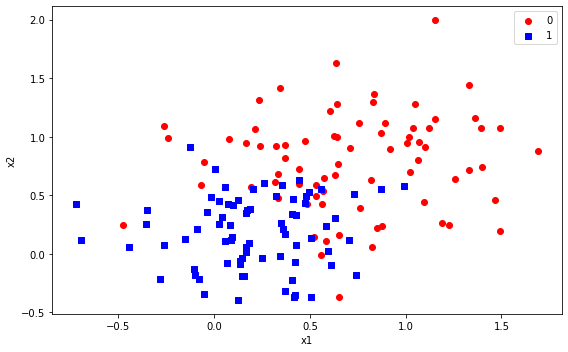

In [3]:
X = np.loadtxt("./overfit_sample_data.csv", delimiter=",")
n_half = len(X)//2
a = X[:n_half, :]
b = X[n_half:, :]

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(a[:, 0], a[:, 1], marker="o", color="r", label="0")
ax.scatter(b[:, 0], b[:, 1], marker="s", color="b", label="1")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()
plt.tight_layout()
plt.show()

### Network and Loss function

In [4]:
datas = tf.constant(X, dtype=tf.float32)
targets = tf.constant([0]*len(a) + [1]*len(b))
print(f"data size = {datas.shape}")
print(f"target size = {targets.shape}")

data size = (150, 2)
target size = (150,)


In [5]:
from matplotlib.colors import ListedColormap 

def draw_decision(model, datas, targets):
    """draw the dicision boundary"""
    X = datas.numpy()
    Y = targets.numpy()
    markers = ("o", "s")
    colors = ("red", "blue")
    cmap = ListedColormap(colors)
    
    lim = 0.5
    x1_min, x1_max = X[:, 0].min() - lim, X[:, 0].max() + lim
    x2_min, x2_max = X[:, 1].min() - lim, X[:, 1].max() + lim
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    xx = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    outputs = tf.cast(tf.greater_equal(tf.sigmoid(model.predict(xx)), 0.5), tf.int8).numpy()
    Z = outputs.reshape(xx1.shape)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    for idx, (cl, color) in enumerate(zip([0, 1], colors)):
        ax.scatter(
            x=X[Y == cl, 0], 
            y=X[Y == cl, 1],
            alpha=0.6, 
            c=color,
            edgecolor='black',
            marker=markers[idx], 
            label=cl
        )
    plt.legend()
    plt.show()

def draw_results(his):
    history = his.history
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax2 = ax.twinx()
    ax.plot(history['loss'], c='b', label='loss')
    ax2.plot(history['accuracy'], c='r', label='accuracy')
    ax2.set_ylim(0.0, 1.05)
    ax2.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    fig.legend(loc=7, bbox_to_anchor=(0, 0, 0.9, 1))
    plt.show()

### Training and Visualization

### without regularization

In [6]:
tf.random.set_seed(seed)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=1, activation=None)
])
loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
his = model.fit(datas, targets, epochs=200, batch_size=50, verbose=0)

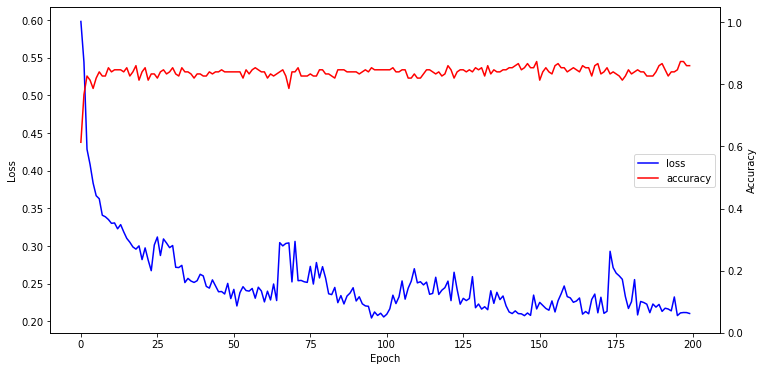

909/909 [==============================] - 1s 603us/step


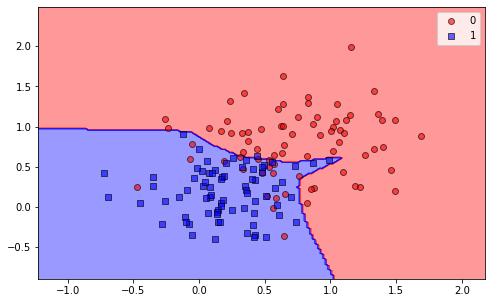

In [7]:
draw_results(his)
draw_decision(model, datas, targets)

## Weight decay

In [8]:
tf.random.set_seed(seed)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=1, activation=None)
])
loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1, decay=0.1)
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
his = model.fit(datas, targets, epochs=200, batch_size=50, verbose=0)

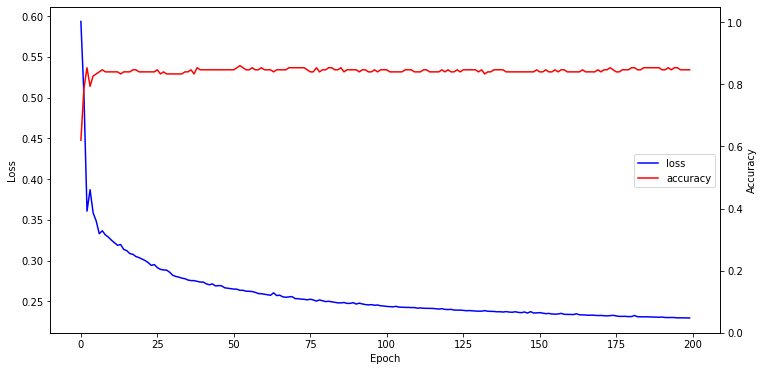

909/909 [==============================] - 1s 592us/step


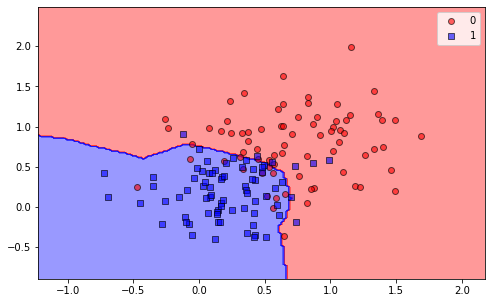

In [9]:
draw_results(his)
draw_decision(model, datas, targets)

## Dropout

* [`tf.keras.layers.Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

In [10]:
tf.random.set_seed(seed)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=1, activation=None)
])
loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
his = model.fit(datas, targets, epochs=200, batch_size=50, verbose=0)

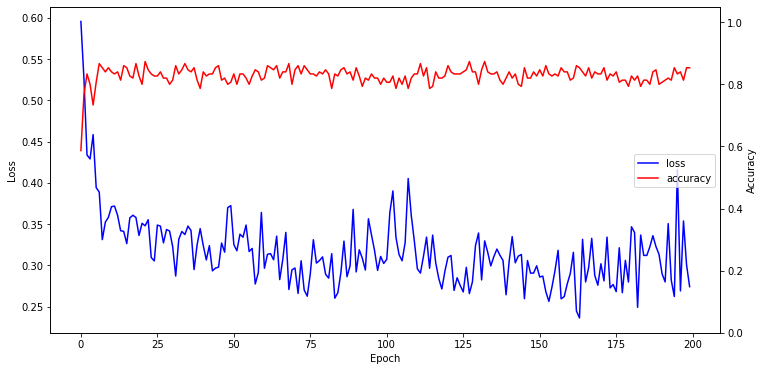

909/909 [==============================] - 1s 731us/step


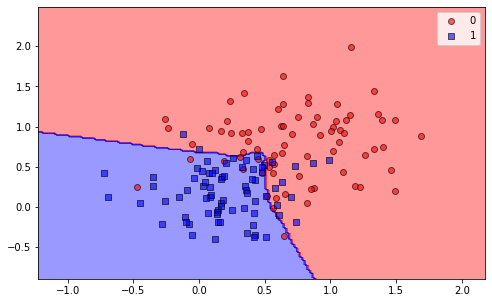

In [11]:
draw_results(his)
draw_decision(model, datas, targets)

## Batch Normalization

* [`tf.keras.layers.BatchNormalization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)

In [12]:
tf.random.set_seed(seed)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=50, activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(units=25, activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(units=1, activation=None)
])
loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
his = model.fit(datas, targets, epochs=200, batch_size=50, verbose=0)

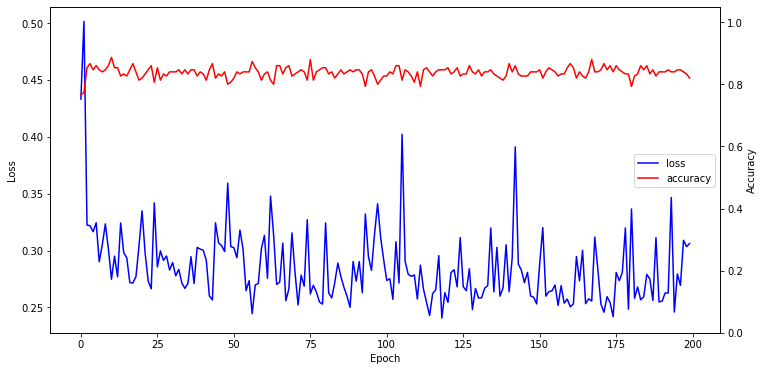

909/909 [==============================] - 1s 1ms/step


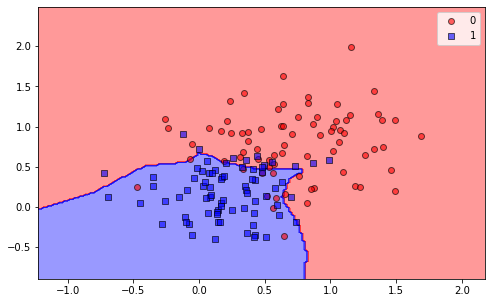

In [13]:
draw_results(his)
draw_decision(model, datas, targets)

## Layer Normalization

* [`tf.keras.layers.LayerNormalization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LayerNormalization)

In [14]:
tf.random.set_seed(seed)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=50, activation=None),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(units=25, activation=None),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(units=1, activation=None)
])
loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
his = model.fit(datas, targets, epochs=200, batch_size=50, verbose=0)

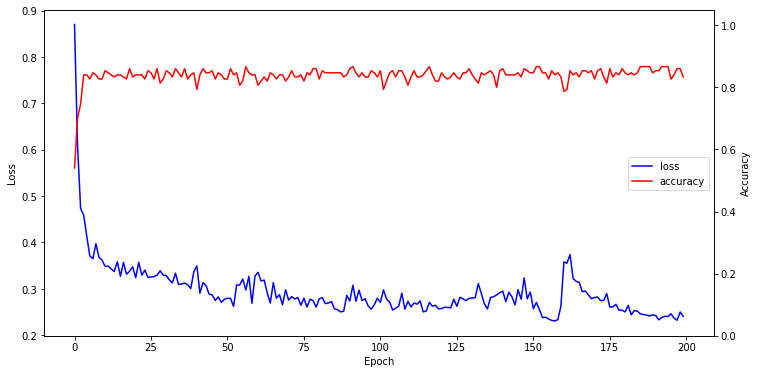

909/909 [==============================] - 1s 1ms/step


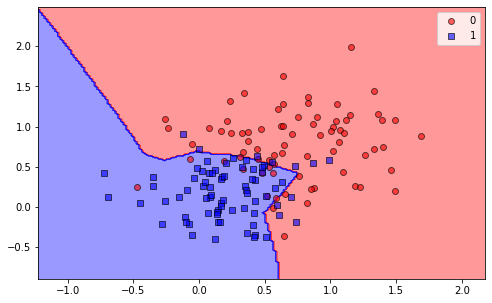

In [15]:
draw_results(his)
draw_decision(model, datas, targets)